In [0]:
# model simple CNN with dropout and no data augmentation

In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [3]:
# define parameters
IMAGE_SIZE = 150
BATCH_SIZE = 20
NUM_EPOCHS = 30
TOTAL_TRAIN_IMAGES = 2000
TOTAL_VALID_IMAGES = 1000
TOTAL_TEST_IMAGES = 1000

# base_dir = 'drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle'
model_dir = '/media/kasparov/F787ACDF571A1D72/ArchiveModel/DogCat_Kaggle/scratch_no-aug_30epochs'
dataset_dir = '/media/kasparov/F787ACDF571A1D72/Dataset/Kaggle/DogCat/4000'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'valid')
test_dir =  os.path.join(dataset_dir, 'test')

print(len(os.listdir(train_dir)))
print(len(os.listdir(model_dir)))

2
0


In [4]:
# define model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
# using ImageDataGenerator to read images from directories
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# define model checkpoint
checkpoint_path = os.path.join(model_dir, 'valid-acc-improvement-{epoch:02d}-{val_acc:.2f}.hdf5')
val_acc_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
# fit model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=TOTAL_TRAIN_IMAGES // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    callbacks=[val_acc_checkpoint],
    validation_data=validation_generator,
    validation_steps=TOTAL_VALID_IMAGES // BATCH_SIZE,
)

Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.6945 - acc: 0.5155 - val_loss: 0.6761 - val_acc: 0.6080

Epoch 00001: val_acc improved from -inf to 0.60800, saving model to /media/kasparov/F787ACDF571A1D72/ArchiveModel/DogCat_Kaggle/scratch_no-aug_30epochs/valid-acc-improvement-01-0.61.hdf5
Epoch 2/30
100/100 [==============================] - 40s 400ms/step - loss: 0.6723 - acc: 0.5905 - val_loss: 0.7041 - val_acc: 0.5070

Epoch 00002: val_acc did not improve from 0.60800
Epoch 3/30
 54/100 [===============>..............] - ETA: 15s - loss: 0.6564 - acc: 0.6019

In [0]:
model.save(os.path.join(model_dir, 'model_without_aug1.h5'))

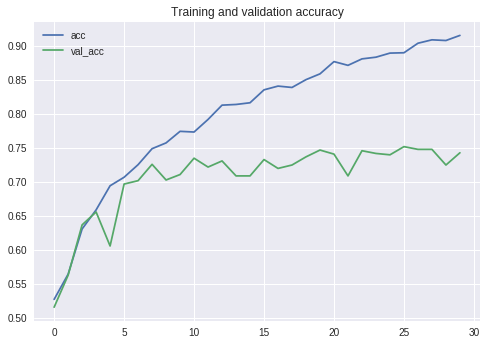

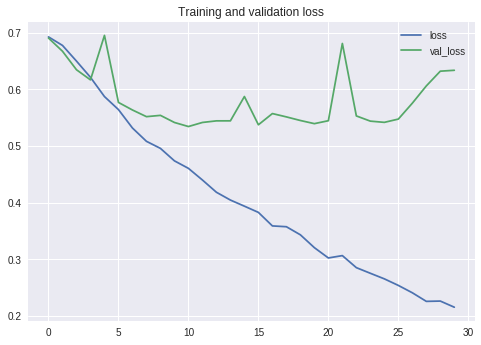

In [0]:
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']


plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# evaluate model